In [1]:
%%bash

pip install -q kaggle
mkdir -p ~/.kaggle
cp drive/MyDrive/kaggle.json ~/.kaggle/
chmod 600 /root/.kaggle/kaggle.json
kaggle datasets download -d emirhanai/emotion-prediction-with-semi-supervised-learning
unzip -qq emotion-prediction-with-semi-supervised-learning.zip

100%|██████████| 2.22M/2.22M [00:00<00:00, 2.75MB/s]


# Emotion Prediction with Semi Supervised Learning

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer


df = pd.read_csv('/content/tweet_emotions.csv')
df.head(5)

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [3]:
from sklearn.linear_model import RidgeClassifier
from sklearn.semi_supervised import SelfTrainingClassifier


X_train, X_test, y_train, y_test = train_test_split(df.content, df.sentiment,
                                                        test_size=0.0007000000000000001,
                                                        random_state=1,shuffle=True)
    
X_CountVectorizer = CountVectorizer(stop_words='english')
X_train_counts = X_CountVectorizer.fit_transform(X_train)
X_TfidfTransformer = TfidfTransformer()
X_train_tfidf = X_TfidfTransformer.fit_transform(X_train_counts)

clf = SelfTrainingClassifier(RidgeClassifier())
clf.fit(X_train_tfidf, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/semi_supervised/_self_training.py:210: UserWarning: y contains no unlabeled samples
  warnings.warn("y contains no unlabeled samples", UserWarning)


SelfTrainingClassifier(base_estimator=RidgeClassifier())

In [9]:
text = """Men need war to grow. 
And friends to go to war with."""
text = X_CountVectorizer.transform([text])

clf.predict(text)

array(['sadness'], dtype='<U10')

# quantam network neural ai

In [ ]:
!pip install pip install tensorflow==2.7.0
!pip install tensorflow-quantum==0.7.2
!pip install pennylane

In [ ]:
!pip install cirq==0.13.1

In [12]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
from keras.models import Model
from tensorflow.keras import layers

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re

import pennylane as qml
from pennylane import numpy as p_np

from pennylane.templates.state_preparations import MottonenStatePreparation
from pennylane.templates.layers import StronglyEntanglingLayers
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [13]:
data = pd.read_csv('/content/tweet_emotions.csv')
plt.style.use('fivethirtyeight')

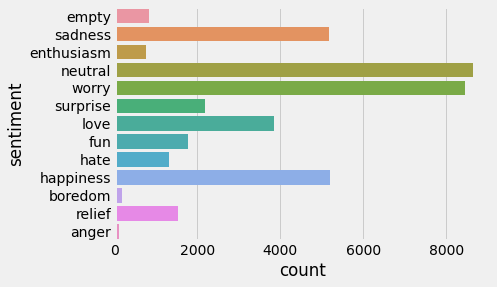

In [14]:
sns.countplot(y=data["sentiment"])

In [17]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
stop_words = set(stopwords.words('english'))
from nltk.stem import RegexpStemmer
snowball = RegexpStemmer('ing$|s$|e$|able$', min=4)

data["content"] = data["content"].apply(lambda x: " ".join([snowball.stem(re.sub(r'[^\w\d]', "", word)) for word in x.lower().split() if word not in stop_words]))

X = data["content"]
tokenize = Tokenizer()

tokenize.fit_on_texts(X)

max_length = 64
vocab_size = len(tokenize.word_index) + 1
X = pad_sequences(tokenize.texts_to_sequences(X), maxlen=max_length, padding="post")

In [19]:
n_qubits = 2
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev)
def qnode(inputs, weights):
    qml.templates.AngleEmbedding(inputs, wires=range(n_qubits))
    qml.templates.StronglyEntanglingLayers(weights, wires=range(n_qubits))
    return qml.expval(qml.PauliZ(0)), qml.expval(qml.PauliZ(1))

weight_shapes = {"weights": (3, n_qubits, 3)}

qlayer = qml.qnn.KerasLayer(qnode, weight_shapes, output_dim=2)
clayer1 = tf.keras.layers.Dense(2)
clayer2 = tf.keras.layers.Dense(13, activation="softmax")
model = tf.keras.models.Sequential([clayer1, qlayer, clayer2])
opt = tf.keras.optimizers.SGD(learning_rate=0.8)
model.compile(opt, loss='mae')

In [20]:
Y = data['sentiment']
from sklearn.preprocessing import LabelEncoder

func = LabelEncoder()

Y = func.fit_transform(Y)
Y = tf.convert_to_tensor(Y)

X = tf.constant(X)
Y = tf.one_hot(Y, depth=1)

In [21]:
model.fit(X,Y, epochs=1, batch_size=256, shuffle=True,steps_per_epoch=1,validation_split=0.1)

1/1 [==============================] - 196s 196s/step - loss: 0.0835 - val_loss: 0.0773


In [22]:
a = "Yes, I am very normal!"
tokenize.fit_on_texts(a)

max_length = 64
vocab_size = len(tokenize.word_index) + 1
a = pad_sequences(tokenize.texts_to_sequences(a), maxlen=max_length, padding="post")

In [23]:
a = tf.constant(a)
prediction = model.predict(a)

In [24]:
ap = []
for i in range(len(prediction)):
    ap.append(np.argmax(prediction[i]))
np.argmax(ap)
result = np.argmax(ap)
result = np.array(result).reshape(1)

In [25]:
func.inverse_transform(result)

array(['neutral'], dtype=object)